#### Carregando dataframe

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("results/resultados_combinados.csv")
df

,type,N,W,w_avg,w_max,v_avg,v_max,BB_sol,BB_time,BB_mem,FPTAS_sol,FPTAS_time,FPTAS_mem,greedy_sol,greedy_time,greedy_mem
0,Large,200,997,498.0900,997.0000,711.5900,1230.0000,5397.000,1556.0,1904.0,5397.000,300534.0,77812.0,5397.000,40,1920
1,Large,500,2543,513.8640,997.0000,494.1420,998.0000,28857.000,338508.0,1912.0,28857.000,547385.0,988776.0,28834.000,113,1904
2,Large,500,2543,513.8640,997.0000,516.6340,1074.0000,4566.000,47974.0,1912.0,4566.000,1447580.0,960140.0,4552.000,114,1912
3,Large,500,2517,508.6120,998.0000,608.6120,1098.0000,7117.000,264675.0,1916.0,7117.000,593078.0,1104824.0,7098.000,83,1912
4,Large,10000,49877,503.7650,1000.0000,497.9070,1000.0000,NaN,NaN,NaN,NaN,NaN,NaN,563605.000,3838,3648
5,Large,1000,5002,505.2900,1000.0000,486.5040,998.0000,NaN,NaN,NaN,54533.000,777960.0,14824.0,54386.000,301,1924
6,Large,100,995,503.7800,995.0000,500.4400,997.0000,9147.000,1013.0,1864.0,9146.000,7019.0,3672.0,8817.000,27,1976
7,Large,2000,10011,505.5650,1000.0000,488.8680,1000.0000,NaN,NaN,NaN,110625.000,1040990.0,49184.0,110547.000,691,1924
8,Large,200,1008,509.1400,995.0000,498.0900,997.0000,11238.000,1036.0,1860.0,11243.000,74424.0,3948.0,11227.000,66,1928
9,Large,5000,25016,505.3290,1000.0000,494.9540,1000.0000,NaN,NaN,NaN,276457.000,816028.0,293580.0,276379.000,1873,3684


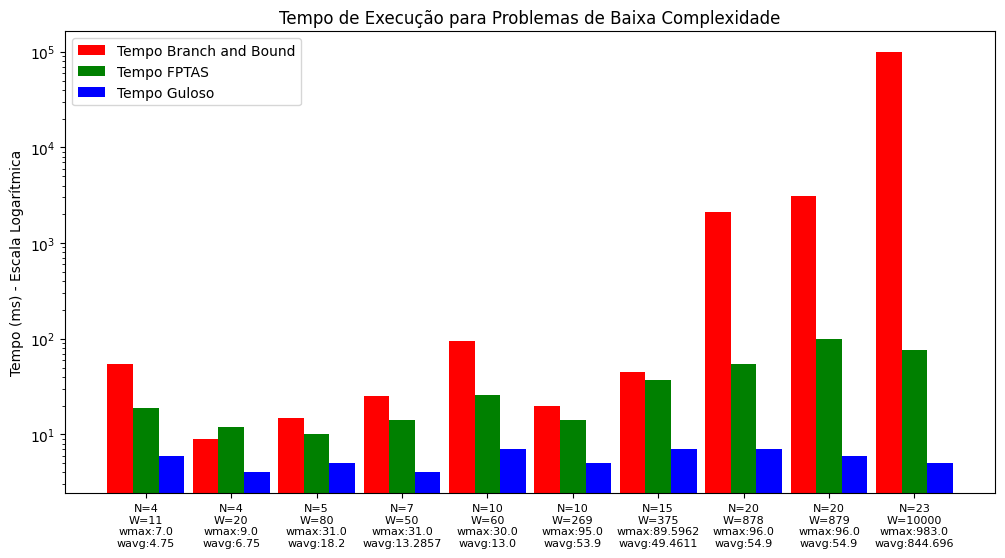

     type      N      W    w_avg   w_max    v_avg   v_max  BB_sol  BB_time  \
13  Large   1000   4990  504.003   998.0  604.003  1098.0     NaN      NaN   
14  Large   1000   5002  505.290  1000.0  486.504   998.0     NaN      NaN   
15  Large   1000   5002  505.290  1000.0  507.950  1091.0     NaN      NaN   
16  Large   2000   9819  495.897  1000.0  595.897  1100.0     NaN      NaN   
17  Large   2000  10011  505.565  1000.0  488.868  1000.0     NaN      NaN   
18  Large   2000  10011  505.565  1000.0  507.579  1091.0     NaN      NaN   
19  Large   5000  24805  501.080  1000.0  601.080  1100.0     NaN      NaN   
20  Large   5000  25016  505.329  1000.0  494.954  1000.0     NaN      NaN   
21  Large   5000  25016  505.329  1000.0  506.900  1091.0     NaN      NaN   
22  Large  10000  49519  500.142  1000.0  600.142  1100.0     NaN      NaN   
23  Large  10000  49877  503.765  1000.0  497.907  1000.0     NaN      NaN   
24  Large  10000  49877  503.765  1000.0  505.684  1100.0     Na

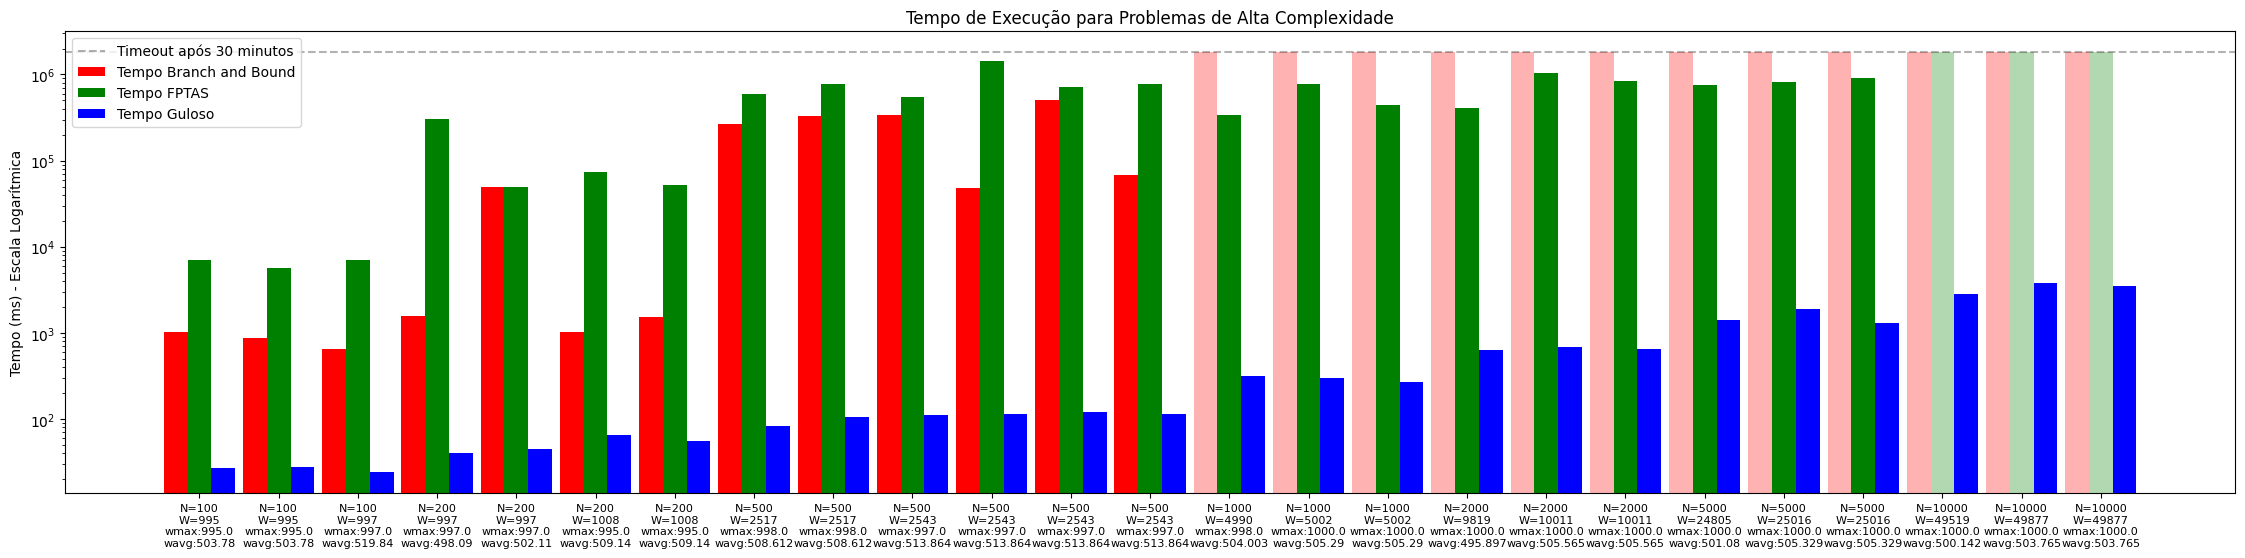

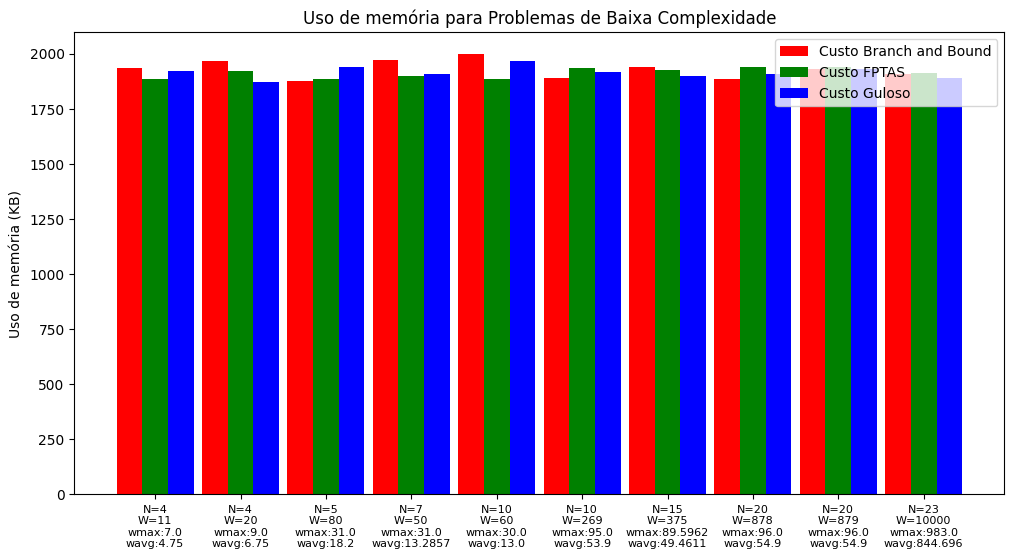

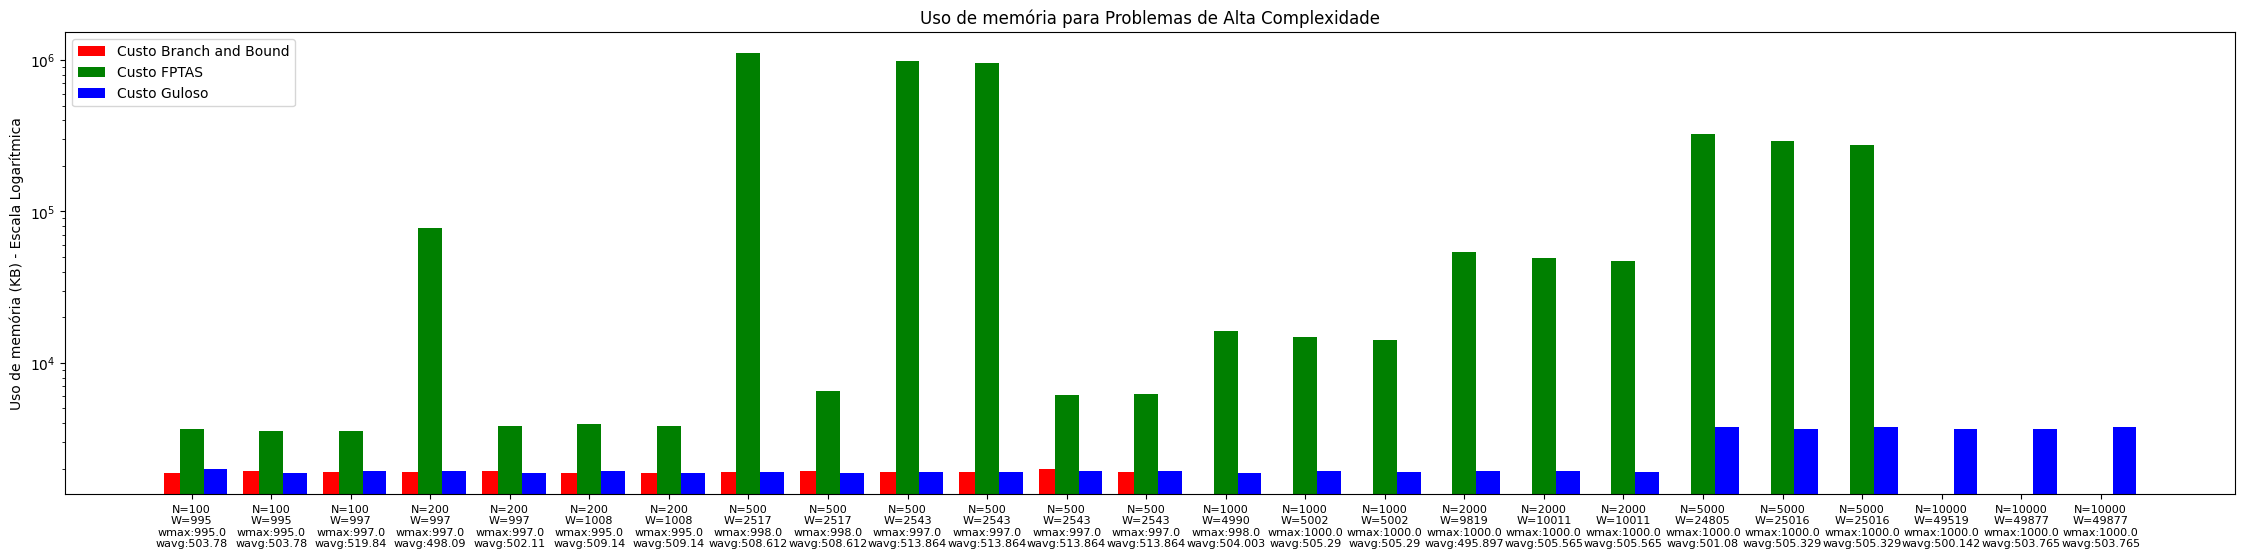

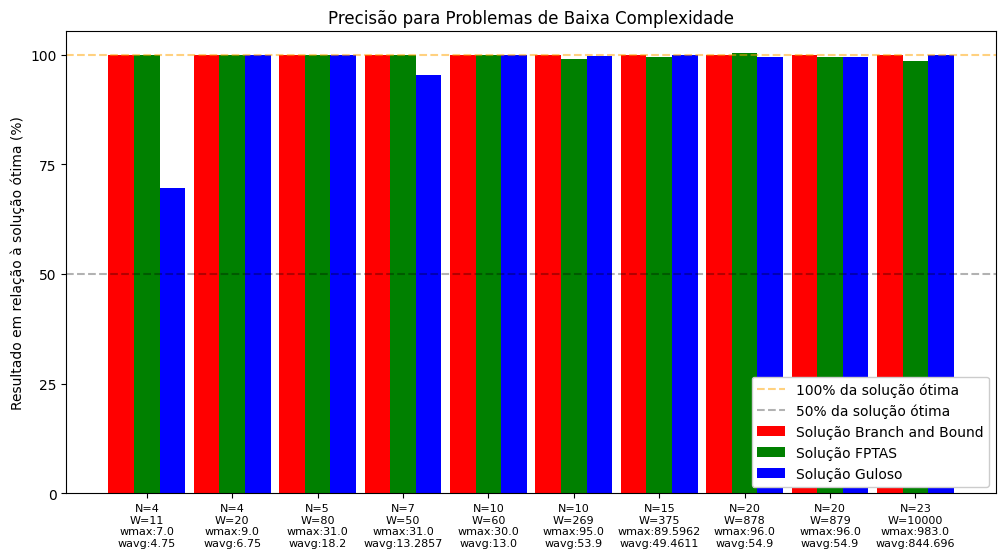

0      9147.0
1      1514.0
2      2397.0
3      5397.0
4      2697.0
5     11238.0
6      1634.0
7      7117.0
8      7117.0
9     28857.0
10     4566.0
11    28857.0
12     4566.0
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
Name: BB_sol, dtype: float64


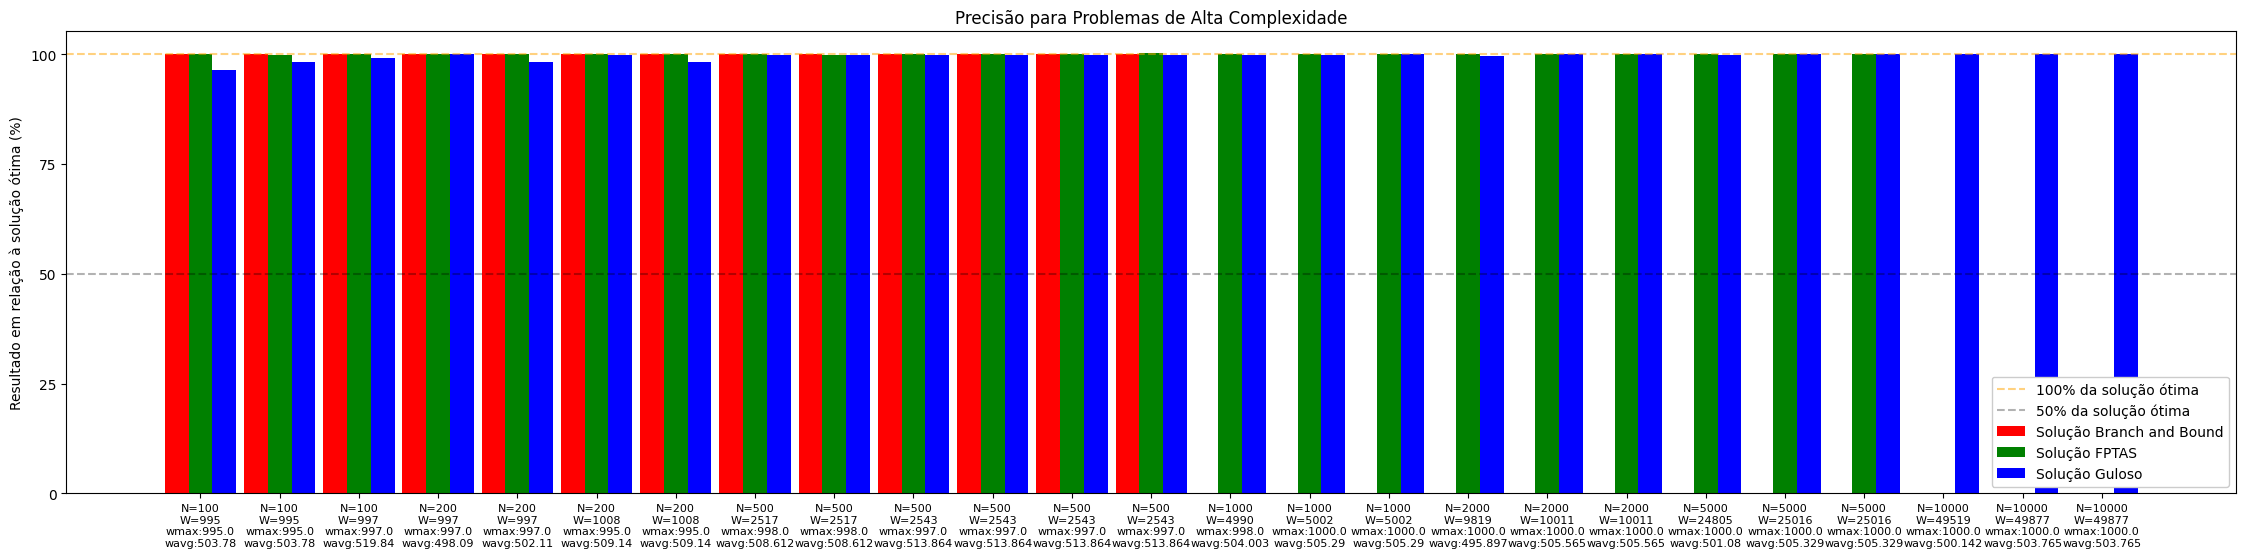

In [ ]:



df_low = df[df['type'] == 'Low'].sort_values(by=['N','W'],ignore_index=True).copy()
df_high = df[df['type'] == 'Large'].sort_values(by=['N','W'],ignore_index=True).copy()

#Tempo
plt.figure(figsize=(12, 6))
plt.title('Tempo de Execução para Problemas de Baixa Complexidade')
plt.yscale('log')
plt.bar(np.arange(len(df_low)) - 0.3, df_low['BB_time'], color='red', width=0.3, label='Tempo Branch and Bound', alpha=1)
plt.bar(np.arange(len(df_low)), df_low['FPTAS_time'], color='green', width=0.3, label='Tempo FPTAS', alpha=1)
plt.bar(np.arange(len(df_low)) + 0.3, df_low['greedy_time'], color='blue', width=0.3, label='Tempo Guloso', alpha=1)
plt.xticks(
    ticks=range(len(df_low)),
    labels=[f"N={n_val}\nW={W_val}\nwmax:{w_max}\nwavg:{w_avg}" for n_val, W_val, w_max, w_avg in zip(df_low['N'], df_low['W'],df_low['w_max'],df_low['w_avg'])],
    rotation=0,
    fontsize=8
)
plt.ylabel('Tempo (ms) - Escala Logarítmica')
plt.legend()
plt.savefig(bbox_inches='tight',fname="images/tempo_low.png")
plt.show()
plt.figure(figsize=(28, 6))
plt.title("Tempo de Execução para Problemas de Alta Complexidade")

bab_timeout = df_high[df_high['BB_time'].isna()]
fptas_timeout = df_high[df_high['FPTAS_time'].isna()]

print(bab_timeout)

plt.yscale('log')
plt.bar(np.arange(len(df_high)) - 0.3, df_high['BB_time'], color='red', width=0.3, label='Tempo Branch and Bound', alpha=1)
plt.bar(bab_timeout.index-0.3,1800000, color='red', width=0.3, alpha=0.3)
plt.bar(np.arange(len(df_high)), df_high['FPTAS_time'], color='green', width=0.3, label='Tempo FPTAS', alpha=1)
plt.bar(fptas_timeout.index,1800000, color='green', width=0.3, alpha=0.3)
plt.bar(np.arange(len(df_high)) + 0.3, df_high['greedy_time'], color='blue', width=0.3, label='Tempo Guloso', alpha=1)
plt.axhline(y=1800000, color='black', linestyle='--', label='Timeout após 30 minutos',alpha=0.3)
plt.xticks(
    ticks=range(len(df_high)),
    labels=[f"N={n_val}\nW={W_val}\nwmax:{w_max}\nwavg:{w_avg}" for n_val, W_val, w_max, w_avg in zip(df_high['N'], df_high['W'],df_high['w_max'],df_high['w_avg'])],
    rotation=0,
    fontsize=8
)
plt.ylabel('Tempo (ms) - Escala Logarítmica')
plt.legend()
plt.savefig(bbox_inches='tight',fname="images/tempo_high.png")
plt.show()

#Espaço
plt.figure(figsize=(12, 6))
plt.title('Uso de memória para Problemas de Baixa Complexidade')
plt.bar(np.arange(len(df_low)) - 0.3, df_low['BB_mem'], color='red', width=0.3, label='Custo Branch and Bound', alpha=1)
plt.bar(np.arange(len(df_low)), df_low['FPTAS_mem'], color='green', width=0.3, label='Custo FPTAS', alpha=1)
plt.bar(np.arange(len(df_low)) + 0.3, df_low['greedy_mem'], color='blue', width=0.3, label='Custo Guloso', alpha=1)
plt.xticks(
    ticks=range(len(df_low)),
    labels=[f"N={n_val}\nW={W_val}\nwmax:{w_max}\nwavg:{w_avg}" for n_val, W_val, w_max, w_avg in zip(df_low['N'], df_low['W'],df_low['w_max'],df_low['w_avg'])],
    rotation=0,
    fontsize=8
)
plt.ylabel('Uso de memória (KB)')
plt.legend()
plt.savefig(bbox_inches='tight',fname="images/custo_low.png")
plt.show()
plt.figure(figsize=(28, 6))
plt.title("Uso de memória para Problemas de Alta Complexidade")
plt.yscale('log')
plt.bar(np.arange(len(df_high)) - 0.2, df_high['BB_mem'], color='red', width=0.3, label='Custo Branch and Bound', alpha=1)
plt.bar(np.arange(len(df_high)), df_high['FPTAS_mem'], color='green', width=0.3, label='Custo FPTAS', alpha=1)
plt.bar(np.arange(len(df_high)) + 0.3, df_high['greedy_mem'], color='blue', width=0.3, label='Custo Guloso', alpha=1)
plt.xticks(
    ticks=range(len(df_high)),
    labels=[f"N={n_val}\nW={W_val}\nwmax:{w_max}\nwavg:{w_avg}" for n_val, W_val, w_max, w_avg in zip(df_high['N'], df_high['W'],df_high['w_max'],df_high['w_avg'])],
    rotation=0,
   fontsize=8
)
plt.ylabel('Uso de memória (KB) - Escala Logarítmica')
plt.legend()
plt.savefig(bbox_inches='tight',fname="images/custo_high.png")
plt.show()


#Precisão
plt.figure(figsize=(12, 6))
plt.title("Precisão para Problemas de Baixa Complexidade")
plt.bar(np.arange(len(df_low)) - 0.3, 100 * df_low['BB_sol']/df_low['BB_sol'], color='red', width=0.3, label='Solução Branch and Bound', alpha=1)
plt.bar(np.arange(len(df_low)), 100 *df_low['FPTAS_sol']/df_low['BB_sol'], color='green', width=0.3, label='Solução FPTAS', alpha=1)
plt.bar(np.arange(len(df_low)) + 0.3, 100 *  df_low['greedy_sol']/df_low['BB_sol'], color='blue', width=0.3, label='Solução Guloso', alpha=1)
plt.xticks(
    ticks=range(len(df_low)),
    labels=[f"N={n_val}\nW={W_val}\nwmax:{w_max}\nwavg:{w_avg}" for n_val, W_val, w_max, w_avg in zip(df_low['N'], df_low['W'],df_low['w_max'],df_low['w_avg'])],
    rotation=0,
   fontsize=8
)
plt.axhline(y=100, color='orange', linestyle='--', label='100% da solução ótima',alpha=0.5)
plt.axhline(y=50, color='black', linestyle='--', label='50% da solução ótima',alpha=0.3)
plt.ylabel('Resultado em relação à solução ótima (%)')
plt.yticks([0,25,50,75,100])
plt.legend(loc='lower right',framealpha=1)
plt.savefig(bbox_inches='tight',fname="images/precisao_low.png")
plt.show()

sols = np.array([9147,1514, 2397, 5397, 2697,11238, 1634, 7117, 7117,28857, 4566,28857, 4566,14390,54503,9052,28919,110625,18051,72505,276457,44356,146919,563647,90204])
plt.figure(figsize=(28, 6))
plt.title("Precisão para Problemas de Alta Complexidade")
plt.bar(np.arange(len(df_high)) - 0.3, 100 * df_high['BB_sol']/sols, color='red', width=0.3, label='Solução Branch and Bound', alpha=1)
plt.bar(np.arange(len(df_high)), 100 * df_high['FPTAS_sol']/sols, color='green', width=0.3, label='Solução FPTAS', alpha=1)
plt.bar(np.arange(len(df_high)) + 0.3, 100 * df_high['greedy_sol']/sols, color='blue', width=0.3, label='Solução Guloso', alpha=1)

print(df_high['BB_sol'])
plt.xticks(
    ticks=range(len(df_high)),
    labels=[f"N={n_val}\nW={W_val}\nwmax:{w_max}\nwavg:{w_avg}" for n_val, W_val, w_max, w_avg in zip(df_high['N'], df_high['W'],df_high['w_max'],df_high['w_avg'])],
    rotation=0,
    fontsize=8
    )
plt.axhline(y=100, color='orange', linestyle='--', label='100% da solução ótima',alpha=0.5)
plt.axhline(y=50, color='black', linestyle='--', label='50% da solução ótima',alpha=0.3)
plt.ylabel('Resultado em relação à solução ótima (%)')
plt.yticks([0,25,50,75,100])
plt.legend(loc='lower right',framealpha=1)
plt.savefig(bbox_inches='tight',fname="images/precisao_high.png")
plt.show()

